# **Experiment 1(b):** Linear Regression using Stochastic Gradient Descent (SGD) and Batch Gradient Descent (BGD) - Iterative Optimization Algorithm *- For the first dataset*


**Steps:**

1. Import necessary libraries
2. Load the datasets using Pandas and split it into training-testing using train_test_split
3. Set hyperparameters: 'learning rate', 'epochs', and 'threshold'
4. Initialize the coefficients for SGD and BGD
5. Implement SGD:
Use loops to iterate through epochs and training data points
Randomly select an instance from the training data for each iteration
Calculate the gradient using the selected instances and update the coefficients            
6. Implement BGD:
Use loops to iterate through epochs and training data points
Calculate the gradient using all training data points and update the coefficients
Check convergence using threshold
7. Print the intercept and coefficient for both SGD and BGD

Compare the results for closed-form solution and iterative optimization algorithms

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import linalg
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('data_0.0 (2).csv')
X = np.array(df['x']).reshape(-1,1)
y = np.array(df['y']).reshape(-1,1)
X.ndim, X.shape, y.ndim, y.shape

(2, (100, 1), 2, (100, 1))

In [3]:
#Add a column of ones to X
m = np.ones(X.shape[0])
m.reshape(-1,1)
X_with_intercept =np.column_stack((m,X))
X_with_intercept.ndim,X_with_intercept.shape

(2, (100, 2))

In [4]:
#Splitting the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_with_intercept, y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80, 1), (20, 1))

In [5]:
theta_init = np.zeros((2,1))

learning_rate = 0.01
num_iteration = 100 #Epochs
threshold = 1e-10

In [6]:
def cost_function(X,y,theta):
  m = len(y)
  y_hat = np.dot(X,theta)
  temp = np.square(y_hat-y)
  J = (1/m)*np.sum(temp)

  return J

In [7]:
m = len(y)
y_hat = np.dot(X_train,theta_init)

In [8]:
def gradient(X,y,theta):
  m = len(y)
  y_hat = np.dot(X,theta)
  X_transpose = np.transpose(X)
  temp1 = np.dot(X_transpose,y_hat-y)
  grad = (1/m)*temp1

  return grad

#temp = gradient(X_train,y_train,theta_init)
#print(temp.shape)
#print(X_train.shape, y_train.shape, theta_init.shape)

In [9]:
def stochastic_gradient_descent(X,y,theta_init,learning_rate,num_iteration):
  m = len(y)
  theta = theta_init.copy()
  J_history = np.zeros(num_iteration)

  for i in range(num_iteration):
    rand_index = np.random.randint(0,m)
    X_i = np.array(X[rand_index,:]).reshape(1,-1)
    y_i = np.array(y[rand_index,:]).reshape(1,-1)
    grad = gradient(X_i,y_i,theta)
    theta = theta - learning_rate*grad
    J_history[i] = cost_function(X_i,y_i,theta)

  return theta, J_history

In [10]:
def batch_gradient_descent(X,y,theta_init,learning_rate,num_iteration):
  m = len(y)
  theta = theta_init.copy()
  J_history = np.zeros(num_iteration)

  for i in range(num_iteration):
    theta_old = theta
    for j in range(m):
      X_i = np.array(X[j,:]).reshape(1,-1)
      y_i = np.array(y[j,:]).reshape(1,-1)
      grad = gradient(X_i,y_i,theta)
      theta = theta - learning_rate*grad
    J_history[i] = cost_function(X_i,y_i,theta)
    if((linalg.norm(theta_old[0]-theta[0]) and linalg.norm(theta_old[1]-theta[1]))<=threshold):
      break

  return theta, J_history

In [11]:
theta_sgd, J_history_sgd = stochastic_gradient_descent(X_train,y_train,theta_init,learning_rate,2000)
print(theta_sgd[0],theta_sgd[1])
#theta_sgd.ndim, theta_sgd.shape

[1.9901446] [3.00146789]


In [12]:
theta_bgd, J_history_bgd = batch_gradient_descent(X_train,y_train,theta_init,learning_rate,num_iteration)
print(theta_bgd[0],theta_bgd[1])

[1.99999999] [3.]


In [13]:
def error(X_test,theta,y_test):
  y_pred = np.dot(X_test,theta)
  mse = mean_squared_error(y_true=y_test,y_pred=y_pred)

  return mse

In [14]:
sgd_error = error(X_test,theta_sgd,y_test)
bgd_error = error(X_test,theta_bgd,y_test)
sgd_error,bgd_error

(2.7270689275903696e-05, 7.921138786752353e-18)

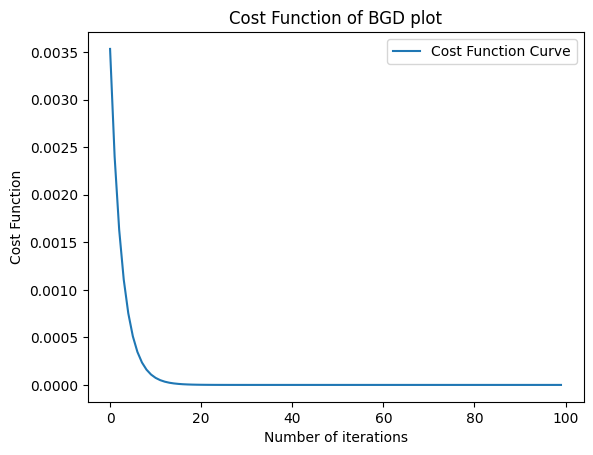

In [15]:
plt.plot(J_history_bgd)
plt.xlabel("Number of iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function of BGD plot")
plt.legend(["Cost Function Curve"])

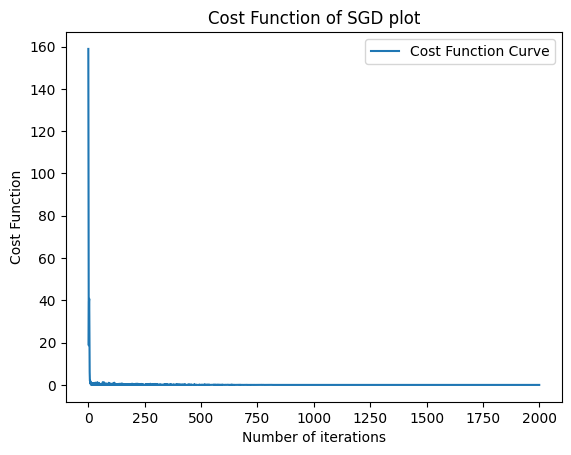

In [16]:
plt.plot(J_history_sgd)
plt.xlabel("Number of iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function of SGD plot")
plt.legend(["Cost Function Curve"])

In [17]:
y_pred_sgd = np.dot(X_test,theta_sgd)
y_pred_bgd = np.dot(X_test,theta_bgd)
#X_test.shape, y_pred_sgd.shape
X_test_mod = X_test[:,1]
X_test_mod.reshape(-1,1)

array([[9.19191919],
       [4.64646465],
       [4.84848485],
       [7.77777778],
       [1.01010101],
       [0.4040404 ],
       [3.93939394],
       [5.75757576],
       [9.7979798 ],
       [6.66666667],
       [3.13131313],
       [0.90909091],
       [2.92929293],
       [3.83838384],
       [8.78787879],
       [8.98989899],
       [7.67676768],
       [6.86868687],
       [1.91919192],
       [0.        ]])

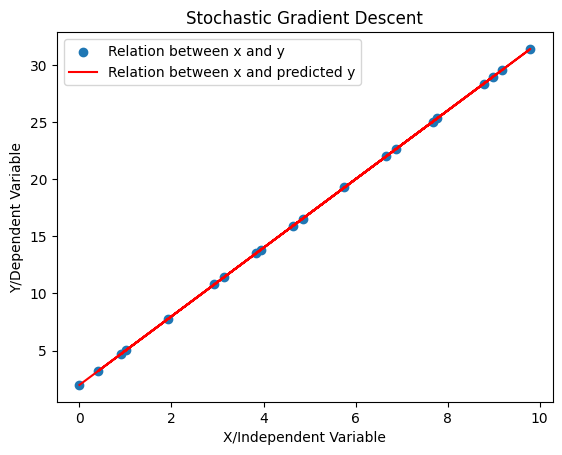

In [18]:
#Plotting the results (Best fit of the data)
plt.scatter(X_test_mod,y_test)
plt.plot(X_test_mod,y_pred_sgd,color='red')
plt.title("Stochastic Gradient Descent")
plt.ylabel("Y/Dependent Variable")
plt.xlabel("X/Independent Variable")
plt.legend(["Relation between x and y","Relation between x and predicted y"])
plt.show()

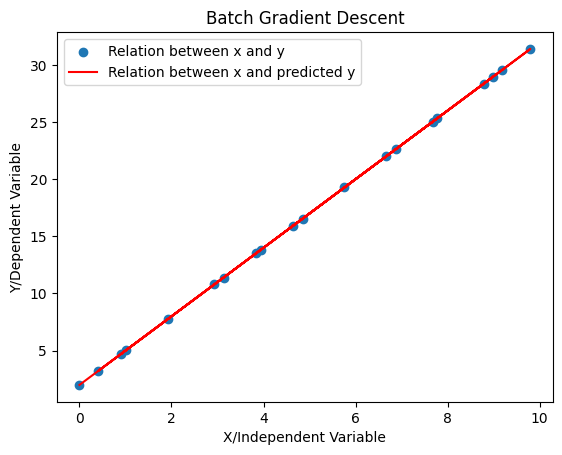

In [19]:
#Plotting the results (Best fit of the data)
plt.scatter(X_test_mod,y_test)
plt.plot(X_test_mod,y_pred_bgd,color='red')
plt.title("Batch Gradient Descent")
plt.ylabel("Y/Dependent Variable")
plt.xlabel("X/Independent Variable")
plt.legend(["Relation between x and y","Relation between x and predicted y"])
plt.show()

# **Experiment 1(b):** Linear Regression using Stochastic Gradient Descent (SGD) and Batch Gradient Descent (BGD) - Iterative Optimization Algorithm *- For the second dataset*


In [100]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import linalg


In [101]:
df = pd.read_csv('data_5.555555555555555.csv')
X = np.array(df['x']).reshape(-1,1)
y = np.array(df['y']).reshape(-1,1)
X.ndim, X.shape, y.ndim, y.shape

(2, (100, 1), 2, (100, 1))

In [102]:
#Add a column of ones to X
m = np.ones(X.shape[0])
m.reshape(-1,1)
X_with_intercept =np.column_stack((m,X))
X_with_intercept.ndim,X_with_intercept.shape

(2, (100, 2))

In [103]:
#Splitting the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_with_intercept, y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80, 1), (20, 1))

In [104]:
theta_init = np.zeros((2,1))

learning_rate = 0.01
num_iteration = 500 #Epochs
threshold = 1e-10

In [105]:
def cost_function(X,y,theta):
  m = len(y)
  y_hat = np.dot(X,theta)
  temp = np.square(y_hat-y)
  J = (1/m)*np.sum(temp)

  return J

In [106]:
m = len(y)
y_hat = np.dot(X_train,theta_init)

In [107]:
def gradient(X,y,theta):
  m = len(y)
  y_hat = np.dot(X,theta)
  X_transpose = np.transpose(X)
  temp1 = np.dot(X_transpose,y_hat-y)
  grad = (1/m)*temp1

  return grad

#temp = gradient(X_train,y_train,theta_init)
#print(temp.shape)
#print(X_train.shape, y_train.shape, theta_init.shape)

In [108]:
def stochastic_gradient_descent(X,y,theta_init,learning_rate,num_iteration):
  m = len(y)
  theta = theta_init.copy()
  J_history = np.zeros(num_iteration)

  for i in range(num_iteration):
    rand_index = np.random.randint(0,m)
    X_i = np.array(X[rand_index,:]).reshape(1,-1)
    y_i = np.array(y[rand_index,:]).reshape(1,-1)
    grad = gradient(X_i,y_i,theta)
    theta = theta - learning_rate*grad
    J_history[i] = cost_function(X_i,y_i,theta)

  return theta, J_history

In [109]:
def batch_gradient_descent(X,y,theta_init,learning_rate,num_iteration):
  m = len(y)
  theta = theta_init.copy()
  J_history = np.zeros(num_iteration)

  for i in range(num_iteration):
    theta_old = theta
    for j in range(m):
      X_i = np.array(X[j,:]).reshape(1,-1)
      y_i = np.array(y[j,:]).reshape(1,-1)
      grad = gradient(X_i,y_i,theta)
      theta = theta - learning_rate*grad
    J_history[i] = cost_function(X_i,y_i,theta)
    if((linalg.norm(theta_old[0]-theta[0]) and linalg.norm(theta_old[1]-theta[1]))<=threshold):
      break

  return theta, J_history

In [110]:
theta_sgd, J_history_sgd = stochastic_gradient_descent(X_train,y_train,theta_init,learning_rate,50000)
print(theta_sgd[0],theta_sgd[1])
#theta_sgd.ndim, theta_sgd.shape

[1.09013565] [3.9194707]


In [111]:
theta_bgd, J_history_bgd = batch_gradient_descent(X_train,y_train,theta_init,learning_rate,num_iteration)
print(theta_bgd[0],theta_bgd[1])
#J_history_bgd.shape

[0.95116205] [3.28488235]


In [112]:
def error(X_test,theta,y_test):
  y_pred = np.dot(X_test,theta)
  mse = mean_squared_error(y_true=y_test,y_pred=y_pred)

  return mse

In [113]:
sgd_error = error(X_test,theta_sgd,y_test)
bgd_error = error(X_test,theta_bgd,y_test)
sgd_error,bgd_error

(58.169567948179136, 44.500602081227306)

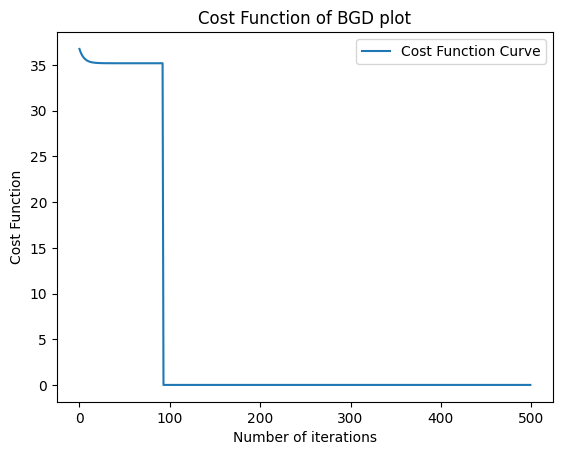

In [114]:
plt.plot(J_history_bgd)
plt.xlabel("Number of iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function of BGD plot")
plt.legend(["Cost Function Curve"])

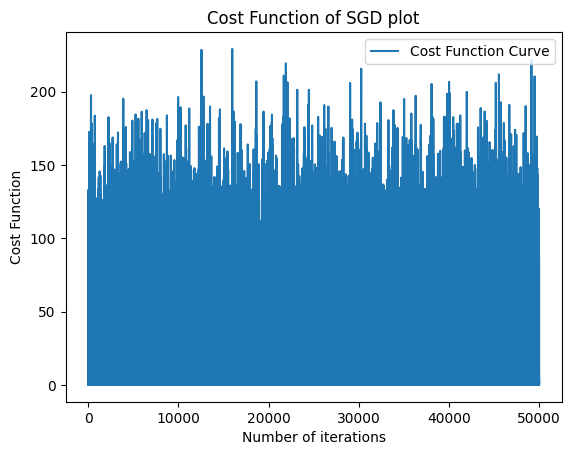

In [115]:
plt.plot(J_history_sgd)
plt.xlabel("Number of iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function of SGD plot")
plt.legend(["Cost Function Curve"])

In [116]:
y_pred_sgd = np.dot(X_test,theta_sgd)
y_pred_bgd = np.dot(X_test,theta_bgd)
#X_test.shape, y_pred_sgd.shape
X_test_mod = X_test[:,1]
X_test_mod.reshape(-1,1)

array([[3.43434343],
       [5.05050505],
       [4.04040404],
       [8.88888889],
       [2.12121212],
       [5.85858586],
       [7.97979798],
       [5.75757576],
       [0.50505051],
       [5.65656566],
       [6.96969697],
       [3.63636364],
       [9.39393939],
       [6.76767677],
       [8.68686869],
       [2.32323232],
       [0.        ],
       [0.70707071],
       [8.38383838],
       [7.17171717]])

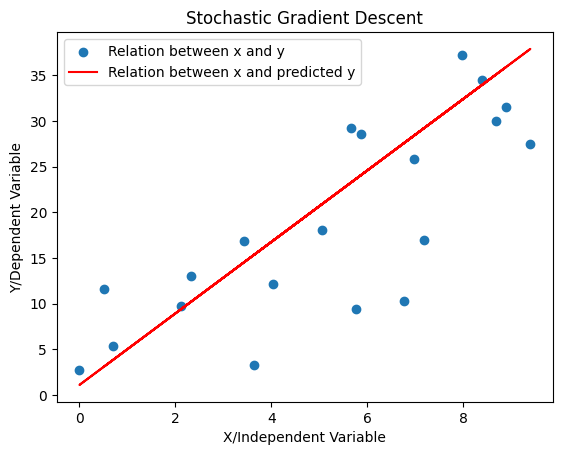

In [117]:
#Plotting the results (Best fit of the data)
plt.scatter(X_test_mod,y_test)
plt.plot(X_test_mod,y_pred_sgd,color='red')
plt.title("Stochastic Gradient Descent")
plt.ylabel("Y/Dependent Variable")
plt.xlabel("X/Independent Variable")
plt.legend(["Relation between x and y","Relation between x and predicted y"])
plt.show()

In [118]:
y_pred_sgd = np.dot(X_test,theta_sgd)
y_pred_bgd = np.dot(X_test,theta_bgd)
#X_test.shape, y_pred_sgd.shape
X_test_mod = X_test[:,1]
X_test_mod.reshape(-1,1)

array([[3.43434343],
       [5.05050505],
       [4.04040404],
       [8.88888889],
       [2.12121212],
       [5.85858586],
       [7.97979798],
       [5.75757576],
       [0.50505051],
       [5.65656566],
       [6.96969697],
       [3.63636364],
       [9.39393939],
       [6.76767677],
       [8.68686869],
       [2.32323232],
       [0.        ],
       [0.70707071],
       [8.38383838],
       [7.17171717]])

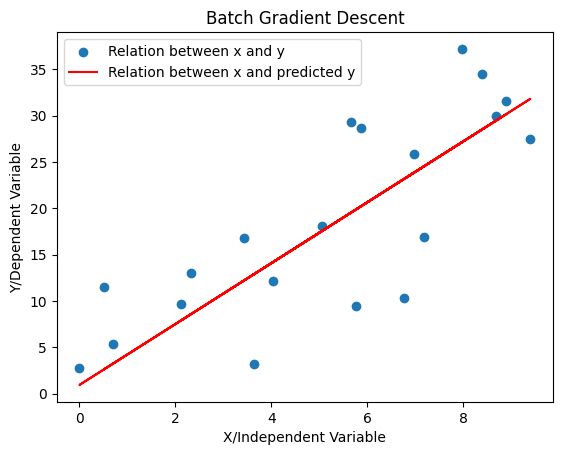

In [119]:
#Plotting the results (Best fit of the data)
plt.scatter(X_test_mod,y_test)
plt.plot(X_test_mod,y_pred_bgd,color='red')
plt.title("Batch Gradient Descent")
plt.ylabel("Y/Dependent Variable")
plt.xlabel("X/Independent Variable")
plt.legend(["Relation between x and y","Relation between x and predicted y"])
plt.show()